In [47]:
import numpy as np, scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [52]:
COSMOS = pd.read_csv('match_COSMOS_99_with_err(1) (1)-Copy1.csv') 
COSMOS_1 = COSMOS[COSMOS.zspec >0] 
COSMOS_1 = COSMOS_1[COSMOS_1.IA767_MAG_APER2 <= 22.5]
COSMOS_1 = COSMOS_1[COSMOS_1.IA767_MAG_APER2 >= 17]
COSMOS_1 = COSMOS_1[COSMOS_1.zspec <= 1.5] 


In [53]:
COSMOS_1 = COSMOS_1[COSMOS_1.columns.drop(list(COSMOS_1.filter(regex='MAGERR')))] 
COSMOS_1 = COSMOS_1.filter(regex='(zspec|MAG)')

In [54]:
y = COSMOS_1['zspec'] 
x = COSMOS_1.drop(['zspec'], axis=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [56]:
clf = MLPRegressor(hidden_layer_sizes=(100,100,100),alpha=0.001,random_state=1) 
clf.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

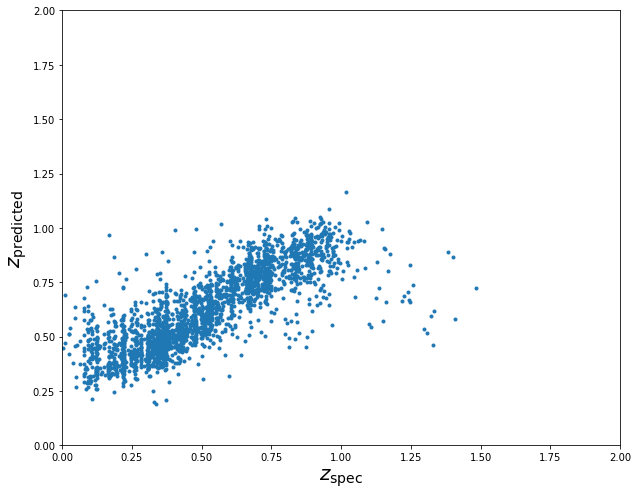

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,prediction,marker=".")
plt.xlim(0.,2)
plt.ylim(0.,2)
plt.xlabel(r'$z_{\rm{spec}}$',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.savefig('redshift')
plt.show()